# Web Analytics 


- Net New Email Subscribes
- Cost per Click
- Count of items in Carts - ecom data
- Top 10 products in cart
- Conversion Rate 
- Join Table using SQLDF


## Import Required Libraries

In [20]:
!pip install pandasql 
import pandas as pd
import numpy as np
from pandasql import sqldf  #!pip install pandasql

from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats

## Net New Email Subscribes

1. Import our email subscription data
1. Create a new feature "net_new_subscribers"
1. Total net new suscribers and visualize

In [21]:
# Import data
df = pd.read_csv("email-subscribes.csv")

In [22]:
# Create new feature
df['net_new_subscribers'] = df['subscribe']-df['unsubscribe']

In [23]:
# Look at dataframe
df.head()

,date,subscribe,unsubscribe,net_new_subscribers
0,1/1/2021,37,3,34
1,1/2/2021,53,4,49
2,1/3/2021,53,3,50
3,1/4/2021,50,4,46
4,1/5/2021,51,1,50


In [24]:
# Total net new subscribers
df['net_new_subscribers'] .sum()

2867

<AxesSubplot:>

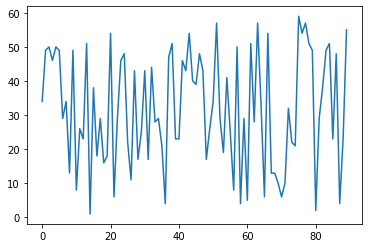

In [25]:
# Visualize net new subscribers
df['net_new_subscribers'].plot(kind='line')

## Cost per Click

Compare daily average cost per click for 2 different ad keywords to see if one keyword is significantly more expensive than another.

1. Create data
1. Visualize
1. Run statistical test to determine significance

In [26]:
# Compare daily average cost per click for 2 different ad keywords

# Create normally distributed sample data to compare
avg, st_dev = .85, 0.1 # mean and standard deviation
keyword_1 = np.random.normal(avg, st_dev, 1000)

avg, st_dev = .95, 0.15
keyword_2 = np.random.normal(avg, st_dev, 1000)

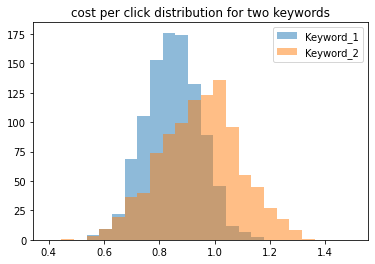

In [27]:
# Create visualization
bins = np.linspace(start=0.4,stop=1.5,num=25)

plt.hist(keyword_1,bins,alpha=0.5,label = 'Keyword_1')
plt.hist(keyword_2,bins,alpha=0.5,label = 'Keyword_2')
plt.legend(loc='upper right')
plt.title("cost per click distribution for two keywords")
plt.show()

In [28]:
# Run t-test
test_statistic,p_value = stats.ttest_ind(keyword_1,keyword_2,equal_var=False)

Before we actually look at the result, we need to decide on our p-value that we will use to determine whether the results are significant.

These are p-values you can use based on your sample size.

| Sample Size |
|-------------|

|  | 30 | 50 | 100 | 1000 |
|------|--------|------|------|--------|
| Weak | 0.076 | 0.053 | 0.032 | 0.009 |
| Fair | 0.028 | 0.019 | 0.010 | 0.003 |
| Strong | 0.005 | 0.003 | 0.001 | 0.0003 |
| Very Strong | 0.001 | 0.0005 | 0.0001 | 0.00004 |

In [29]:
# Check p_value
p_value

6.230420739974004e-66

Is the p-value for the statistical test smaller than the threshold in the table above? If so, then you can conclude that the keywords are significantly different from one another in terms of cost.

## Add-to-Carts

1. Import [ecom data](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store?select=2019-Oct.csv)
1. Count the add-to-cart events
1. Break down by subcategories (e.g., brand, location, etc.)

In [41]:
# Import data using only the columns we need
import os
import pandas as pd
import_columns = ['event_type','brand','product_id','user_id','user_session']
df= pd.read_csv('2019-Nov.csv',encoding='utf-8',usecols = import_columns) 

In [44]:
# Count add-to-cart events
df.head(20)

,event_type,product_id,brand,user_id,user_session
0,view,1003461,xiaomi,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,view,5000088,janome,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,view,17302664,creed,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,view,3601530,lg,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,view,1004775,xiaomi,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,view,1306894,hp,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,view,1306421,hp,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,view,15900065,rondell,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,view,12708937,michelin,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,view,1004258,apple,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [47]:
add_to_carts =len(df[df['event_type'] == 'cart'])
print(f"there are {add_to_carts} add-to-carts in the data")

there are 3028930 add-to-carts in the data


In [46]:
add_to_carts

3028930

Now we can look at add-to-cart events by brand to see which brands are the most popular.

In [50]:
# Create dataframe grouping add-to-carts by brand
brand_df = ((df[df['event_type']=='cart']
             .groupby('brand')
             .agg(add_to_carts = pd.NamedAgg(column = 'event_type',aggfunc='count')))
            .sort_values(by=['add_to_carts'],ascending =False))


In [52]:
brand_df.head(10)

,add_to_carts
brand,
samsung,597220
apple,489665
xiaomi,260019
huawei,73760
cordiant,59587
lg,49394
oppo,44627
lucente,39050
sony,34932


Text(0.5, 1.0, 'Top 10 Products in cart')

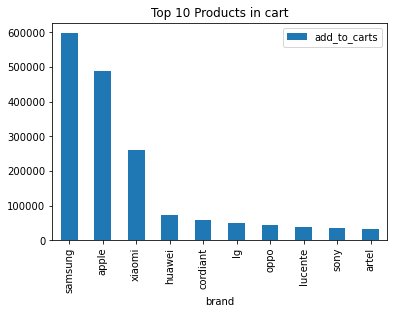

In [55]:
# Make a quick bar plot to see if there's anything interesting!
brand_df.head(10).plot(kind='bar')
plt.title("Top 10 Products in cart")

## Conversion Rate
A quick calculation. Number of sessions where a purchase was made divided by the total number of unique sessions.


In [61]:
# Create total sessions and sessions with purchase variables
total_sessions = df['user_session'].nunique()
purchase_sessions = df[df['event_type']=='purchase']['user_session'].nunique()
# Divide purchase into total to get conversion rate


In [62]:
# Print conversion rate statement
conversion_rate = purchase_sessions/total_sessions

In [63]:
print(f"Converstion Rate : {round(conversion_rate*100,1)}% ")

Converstion Rate : 5.6% 


## Average Order Value (AOV)

1. Import [Olist data](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv). Multiple datasets and joining them with SQL.
1. Overall AOV from payments dataset
1. Join all datasets to subset AOV by different subcategories (e.g., city, state)

In [87]:
# Import data and columns that we need
payments_df =pd.read_csv('olist_order_payments_dataset.csv',encoding='utf-8',usecols=['order_id','payment_type','payment_value'])
orders_df =pd.read_csv('olist_orders_dataset.csv',encoding='utf-8',usecols=['order_id','customer_id'])
customers_df = pd.read_csv('olist_customers_dataset.csv',encoding='utf-8',usecols=['customer_id','customer_city','customer_state'])

In [88]:
# This is the "vanilla" Average Order Value (AOV)
payments_df['payment_value'].mean()

154.10038041698365

### Joining Tables for Deeper Analysis

We can join related tables together to give us new data to work with. Here, we will use SQL.

In [77]:
# View payments data
payments_df.head(1)

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33


In [78]:
orders_df.head(1)

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d


In [79]:
customers_df.head(1)

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP


In [83]:
# Create SQL query to show AOV by state
query = '''
        SELECT c.customer_state,
               AVG(p.payment_value) as avg_order_value
        FROM payments_df p
        JOIN orders_df o
            ON o.order_id = p.order_id
        JOIN customers_df c
            ON c.customer_id = o.customer_id
        GROUP BY c.customer_state
        ORDER BY AVG(p.payment_value) DESC
'''

print(sqldf(query))

   customer_state  avg_order_value
0              PB       248.325825
1              AC       234.293095
2              RO       233.203831
3              AP       232.325714
4              AL       227.077424
5              RR       218.796087
6              PA       215.920722
7              SE       208.438366
8              PI       207.106813
9              TO       204.270199
10             CE       199.902740
11             MA       198.856610
12             RN       196.778027
13             MT       195.228904
14             PE       187.992153
15             MS       186.867989
16             AM       181.603442
17             BA       170.816017
18             SC       165.979337
19             GO       165.763404
20             DF       161.134791
21             RJ       158.525888
22             RS       157.180406
23             ES       154.706953
24             MG       154.706434
25             PR       154.153626
26             SP       137.504630


How many orders are from each state? That could have an impact on the average order value.

In [84]:
# Adding the count of orders to the query
query = '''
        SELECT c.customer_state,
               AVG(p.payment_value) as avg_order_value,
               COUNT(p.order_id) as number_of_orders
        FROM payments_df p
        JOIN orders_df o
            ON o.order_id = p.order_id
        JOIN customers_df c
            ON c.customer_id = o.customer_id
        GROUP BY c.customer_state
        -- ORDER BY AVG(p.payment_value) DESC
        ORDER BY COUNT(p.order_id) DESC
'''

print(sqldf(query))

   customer_state  avg_order_value  number_of_orders
0              SP       137.504630             43622
1              RJ       158.525888             13527
2              MG       154.706434             12102
3              RS       157.180406              5668
4              PR       154.153626              5262
5              SC       165.979337              3754
6              BA       170.816017              3610
7              DF       161.134791              2204
8              GO       165.763404              2112
9              ES       154.706953              2107
10             PE       187.992153              1728
11             CE       199.902740              1398
12             PA       215.920722              1011
13             MT       195.228904               958
14             MA       198.856610               767
15             MS       186.867989               736
16             PB       248.325825               570
17             PI       207.106813            

In [85]:
# Save query results to a dataframe for further analysis
avg_order_df = sqldf(query)

In [86]:
# View query result dataframe
avg_order_df

,customer_state,avg_order_value,number_of_orders
0,SP,137.504630,43622
1,RJ,158.525888,13527
2,MG,154.706434,12102
3,RS,157.180406,5668
4,PR,154.153626,5262
5,SC,165.979337,3754
6,BA,170.816017,3610
7,DF,161.134791,2204
8,GO,165.763404,2112
9,ES,154.706953,2107


## Bonus: 5 Project Ideas
The datasets today are great sources of projects. Google Analytics also has free e-Commerce data available for the Google official merchandise store. To set up an account, click [here](https://support.google.com/analytics/answer/6367342?hl=en). It only takes about 30 seconds to set up.

Once you've got that set up, try these projects:

1. Use [ecom data](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store?select=2019-Oct.csv) from the add-to-cart section above to see which specific products are added to cart most often.
1. Use [full Olist ecom dataset](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv) from the AOV section above to calculate average delivery times for each state. There may be certain locations that are experiencing long wait times for products.
1. Identify top performing keywords by number of clicks and by cost. Make recommendations regarding specific keywords or ad campaigns that should receive more budget or be discontinued.
1. Calculate cost per conversion for Q1 2021 (Jan-Apr) and find the products that were involved in the most conversions.
1. Analyze the bounce rate for the top 10 webpages on the site. Make recommendations regarding A/B tests that could be conducted to reduce the bounce rate and retain traffic.